In [4]:
from torch.utils.data import random_split, DataLoader

from trainer import Trainer
from models import UNet
from utils import CelebADataset

import matplotlib.pyplot as plt

import pickle

In [5]:
with open("../data/celeba_male_number.pickle", "rb") as f:
    male_number = pickle.load(f)

print(len(male_number))

7443


In [7]:
dataset = CelebADataset(male_number)
trainset, validset = random_split(dataset, lengths=[6500, len(dataset) - 6500])
trainloader = DataLoader(trainset, batch_size=32, shuffle=True)
validloader = DataLoader(validset, batch_size=64)

print(len(trainset), len(validset))

6500 943


In [8]:
model = UNet()
device = "cuda"

In [9]:
trainer = Trainer(
    device=device,
    model=model,
    trainloader=trainloader,
    validloader=validloader,
    lr=0.002
)

In [10]:
trainer.run(epochs=50)

EPOCH: 1/50, train_loss: 0.24429, valid_loss: 0.14482, time: 71.847s
EPOCH: 2/50, train_loss: 0.11090, valid_loss: 0.10859, time: 71.100s
EPOCH: 3/50, train_loss: 0.08966, valid_loss: 0.10201, time: 71.740s
EPOCH: 4/50, train_loss: 0.07932, valid_loss: 0.08701, time: 70.706s
EPOCH: 5/50, train_loss: 0.07495, valid_loss: 0.08251, time: 71.107s
EPOCH: 6/50, train_loss: 0.07449, valid_loss: 0.08245, time: 71.459s
EPOCH: 7/50, train_loss: 0.06487, valid_loss: 0.07080, time: 70.626s
EPOCH: 8/50, train_loss: 0.06030, valid_loss: 0.06913, time: 71.722s
EPOCH: 9/50, train_loss: 0.05976, valid_loss: 0.06775, time: 72.098s
EPOCH: 10/50, train_loss: 0.05664, valid_loss: 0.07543, time: 71.560s
EPOCH: 11/50, train_loss: 0.05596, valid_loss: 0.06990, time: 72.284s
EPOCH: 12/50, train_loss: 0.05562, valid_loss: 0.06680, time: 71.574s
EPOCH: 13/50, train_loss: 0.05070, valid_loss: 0.06368, time: 71.776s
EPOCH: 14/50, train_loss: 0.05356, valid_loss: 0.07091, time: 72.113s
EPOCH: 15/50, train_loss: 0.0

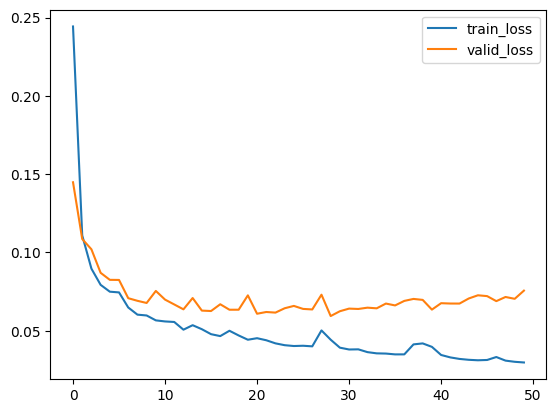

In [11]:
plt.plot(range(50), trainer.train_history["avg"], label="train_loss")
plt.plot(range(50), trainer.valid_history["avg"], label="valid_loss")
plt.legend()
plt.show()

In [12]:
import torch

for idx in range(50):
    if trainer.valid_history["avg"][idx] == min(trainer.valid_history["avg"]):
        torch.save(trainer.model_params[idx], "./best_params.pth")
        print(idx)
        break

28


In [19]:
acc = 0

model.eval()

with torch.no_grad():

    for (x, y) in validloader:
        x, y = x.to(device), y.to(device)

        pred = model(x)

        acc += ((torch.round(pred) == y).sum() / y.numel()).item()

acc /= len(validloader)
print(f"acc: {round(acc, 4)}%")

acc: 0.9675%
